# Analiza svetske populacije 

Tema ovog projekta je analiza svetske populacije. Istražićemo demografske karakteristike zemalja i kako su se one menjala sa posebnim akcentom na zemlje Evrope i bivše Jugoslavije. Tema rada je deo opšte kulture i kao takva je svim ljudima od interesa. 

In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd
import matplotlib.ticker as mtick

## Loading and Data Preprocessing

Podatke smo preuzeli sa platforme Kaggle (https://www.kaggle.com/datasets/chandanchoudhury/world-population-dataset), a oni su podatke uzeli sa worldometers.info i Vikipedije. Sa izuzetkom od par lose parsiranih podataka, sam set je voma dobrog kvaliteta i ne sadrzi null podatake. 

In [3]:
world_pop_by_country = pd.read_csv('world_population_by_country_2023.csv',index_col=0)

# Promena lose unetnih vrednosti
world_pop_by_country.at['Denmark','fertility_rate'] = 1.7
world_pop_by_country.at['Denmark','median_age'] = 41
world_pop_by_country.at['Dominican Republic','fertility_rate'] = 2.3
world_pop_by_country.sample(7)

,population,yearly_change,net_change,density,land_area,net_migrants,fertility_rate,median_age,population_urban,world_share
country,,,,,,,,,,
Kiribati,133515,1.74,2283,165,810,-400,3.2,22.0,56.0,0.00
Mozambique,33897354,2.81,927836,43,786380,-5000,4.5,17.0,40.0,0.42
Sweden,10612086,0.59,62739,26,410340,39998,1.7,40.0,86.0,0.13
Gabon,2436566,1.99,47574,9,257670,1000,3.4,22.0,85.0,0.03
Sao Tome & Principe,231856,1.97,4476,242,960,-600,3.7,19.0,77.0,0.00
Australia,26439111,1.00,261698,3,7682300,139991,1.6,38.0,86.0,0.33
Montenegro,626485,-0.10,-597,47,13450,-480,1.7,39.0,69.0,0.01


In [4]:
population_by_year = pd.read_csv('world_population_by_year_1950_2023.csv',index_col=0).T
population_by_year

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
1950,7480461,1252582,9019866,19032,6005,4478184,5017,45435,17017742,1385041,...,2234144,6247550,51568,5488614,25109200,8535,12982,4712810,2318448,2791326
1951,7571537,1289168,9271734,19425,5827,4569738,5244,46398,17354612,1424000,...,2256072,6408801,52432,5732104,25627533,8810,14267,4782787,2384836,2881713
1952,7667533,1326948,9521702,19561,5454,4663958,5403,47359,17693853,1465061,...,2280660,6576712,53361,5980378,26189593,9169,15648,4855822,2453511,2973713
1953,7764546,1366744,9771686,19670,5308,4758724,5529,48317,18032740,1508559,...,2307491,6754273,54411,6233183,26820851,9528,17165,4931833,2525024,3067899
1954,7864285,1409005,10011541,19758,5566,4850458,5659,49280,18369249,1554921,...,2336182,6941899,55547,6490130,27507453,9693,18848,5010564,2599541,3164517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,37769499,2873883,42705368,47321,76343,32353588,15380,92117,44745520,2820602,...,3428409,32976948,304404,28971683,95776716,11714,544876,31546691,18380477,15354608
2020,38972230,2866849,43451666,46189,77700,33428486,15585,92664,45036032,2805608,...,3429086,33526656,311685,28490453,96648685,11655,556048,32284046,18927715,15669666
2021,40099462,2854710,44177969,45035,79034,34503774,15753,93219,45276780,2790974,...,3426260,34081449,319137,28199867,97468029,11627,565581,32981641,19473125,15993524
2022,41128771,2842321,44903225,44273,79824,35588987,15857,93763,45510318,2780469,...,3422794,34627652,326740,28301696,98186856,11572,575986,33696614,20017675,16320537


In [55]:
# Ucitavanje podata. Uskladjivanje imena drzava
# biblioteka gpd sadrzi shapefile koji predstavlja svet
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.name = world.name.replace('United States of America','United States')\
                    .replace('Dem. Rep. Congo','Congo')\
                    .replace('Palestine','State of Palestine')\
                    .replace('Central African Rep.','Central African Republic')\
                    .replace('Czechia','Czech Republic (Czechia)')\
                    .replace('Bosnia and Herz.','Bosnia and Herzegovina')\
                    .replace('W. Sahara','Western Sahara')\
                    .replace('Dominican Rep.','Dominican Republic')\
                    .replace('Falkland Is.','Falkland Islands')\
                    .replace('Solomon Is.','Solomon Islands')\
                    .replace('S. Sudan','South Sudan')\
                    .replace('eSwatini','Eswatini')\
                    .replace('Eq. Guinea','Equatorial Guinea')


# Prilagodjavanje geometrija drzava. Uklanjanje nepostojecih
world.loc[world.name == "Serbia", "geometry"] = (
    world.loc[world.name == "Serbia", "geometry"]
    .reset_index()
    .union(world.loc[world.name == "Kosovo", "geometry"].reset_index())
).values

world.loc[world.name == "Somalia", "geometry"] = (
    world.loc[world.name == "Somalia", "geometry"]
    .reset_index()
    .union(world.loc[world.name == "Somaliland", "geometry"].reset_index())
).values

world.loc[world.name == "Cyprus", "geometry"] = (
    world.loc[world.name == "Cyprus", "geometry"]
    .reset_index()
    .union(world.loc[world.name == "N. Cyprus", "geometry"].reset_index())
).values
world = world.set_index('name').drop(['pop_est','iso_a3','gdp_md_est'],axis = 1).drop(['Kosovo','Somaliland','N. Cyprus','Antarctica','Fr. S. Antarctic Lands'],axis=0)


In [6]:
# It is important to note that world dataset does not contain many countires, especially those island nations. It does not contain Malta or Lichenstein

In [50]:
# Spajanje dataseta sa geografskim i podacima o populaciji
world_df = world.merge(world_pop_by_country,how='left',left_index=True,right_index=True)

# Izdvajanje Evrope
europe_df = world_df[(world_df.continent=='Europe')|(world_df.index.isin(["Armenia","Azerbaijan", "Georgia",'Turkey']))]

In [8]:
# Racunanjve globalnog rasta populacije po godini
world_pop_by_year = population_by_year.sum(axis=1)

# Racunanje procenta rasta populacije
world_growth_by_year = []
for i in range(1,len(world_pop_by_year)):
    world_growth_by_year.append((world_pop_by_year.iloc[i]-world_pop_by_year.iloc[i-1])/world_pop_by_year.iloc[i-1]*100
)

In [9]:
# Ucitavanje dataset koji nam govori o svetskom siromastvu. 
poverty = pd.read_csv('poverty-explorer.csv')
poverty[['% Under $5.50 Per Day', 'Change']]= poverty[['% Under $5.50 Per Day', 'Change']].apply(lambda x: x.str.replace('%','').astype(float))

# Procesiranje dataseta
world_pop_growth_by_year_df = pd.Series(world_growth_by_year,index=population_by_year.index[1:])
world_pop_growth_by_year_df.index = world_pop_growth_by_year_df.index.astype(int)
world_pop_growth_by_year_df.name = 'Growth'

# Spajanje seta podataka koji nam govori o siromastvu i stopi rasta populacije. KOristimo ovaj set pred kraj
poverty = poverty.merge(world_pop_growth_by_year_df,left_on='Year',right_index=True)

In [60]:
legend_size=20
title_size=30

## General

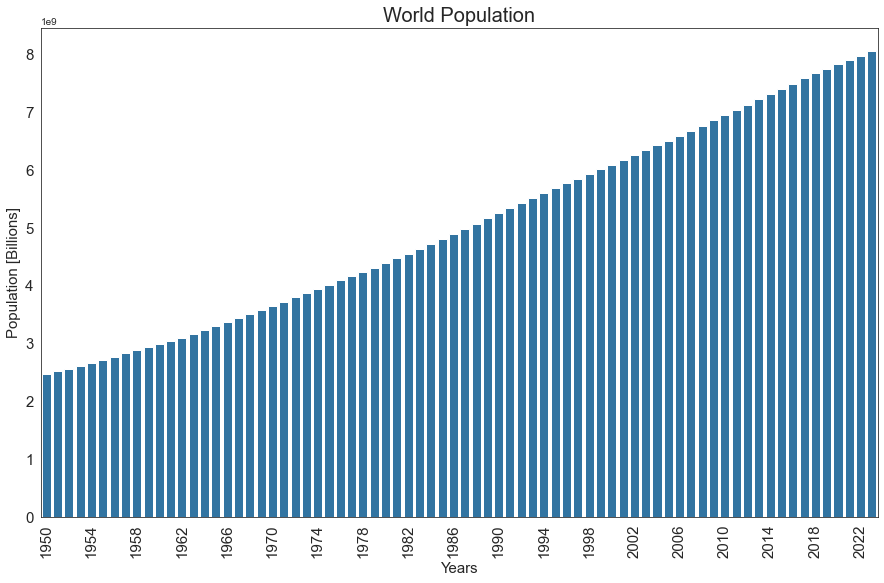

In [62]:
plt.figure(figsize=(15, 9))

sns.barplot(x=world_pop_by_year.index, y=world_pop_by_year.values, color='tab:blue')

plt.title('World Population', fontsize=20)

plt.xticks(rotation=90, fontsize=15, ticks=range(0, len(world_pop_by_year.index), 4))
plt.yticks(fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Population [Billions]', fontsize=15)
plt.show()

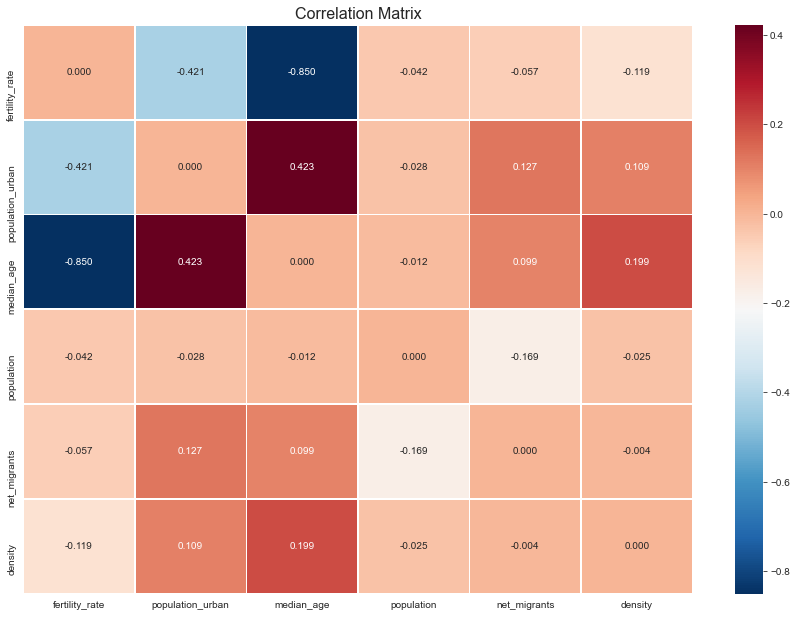

In [66]:
# Racunanje matrice korelacije
corr_matrix = world_pop_by_country[['fertility_rate','population_urban','median_age','population','net_migrants','density']].corr()
# Popunjavamo dijagonalne elemente sa nulom znog lepse vizualizacije
np.fill_diagonal(corr_matrix.values, 0)


plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=True, fmt=".3f", linewidths=0.8)
plt.title('Correlation Matrix', fontsize=16)
plt.subplots_adjust(bottom=0.002)
plt.show()

Iz ove korelacione matrice mozemo da izvucemo sledece zakljuce:
- Sto je stopa plodnosti veca to je populacija mladja - ove je poprilicno ocigledno 
- Sto je populacija urbanija to je to je stopa plodnosti manja. Samim tim sto je populacija urbanija to je narod stariji
- Imamo malu korelaciju (-0.169) sto bi pomalo nagovestava da drzave sa puno stanovnika imaju dosta onih koji se iz drzave sele. 
- Takodje sto je populacija urbanija tu vise ljudi dolaze 
- Sto gusce naseljeno mesto to su ljudi stariji. Ove je zbog malih "drzava" kao sto su Tajvan, Hong Kong, Singapur,Monako, ali i Belgija, Holandija, Engleska. Sa druge strane imamo Rwandu i Banglades koje imaju i veliku gustinu i mlado stanovnisto

## Population Density

In [70]:
# Deljnje numerickih podataka u vise kategorickih intervala
bins = np.array([0,10,25,50,100,200,500,np.inf])
europe_df.loc[:, 'density_categories'] = pd.cut(
    europe_df["density"],
    bins=bins,
    labels=[f'{int(bins[i - 1])}-{int(bins[i])}' for i in range(1, len(bins)-1)] + ['> 500']
)

C:\Users\ilija\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\ilija\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


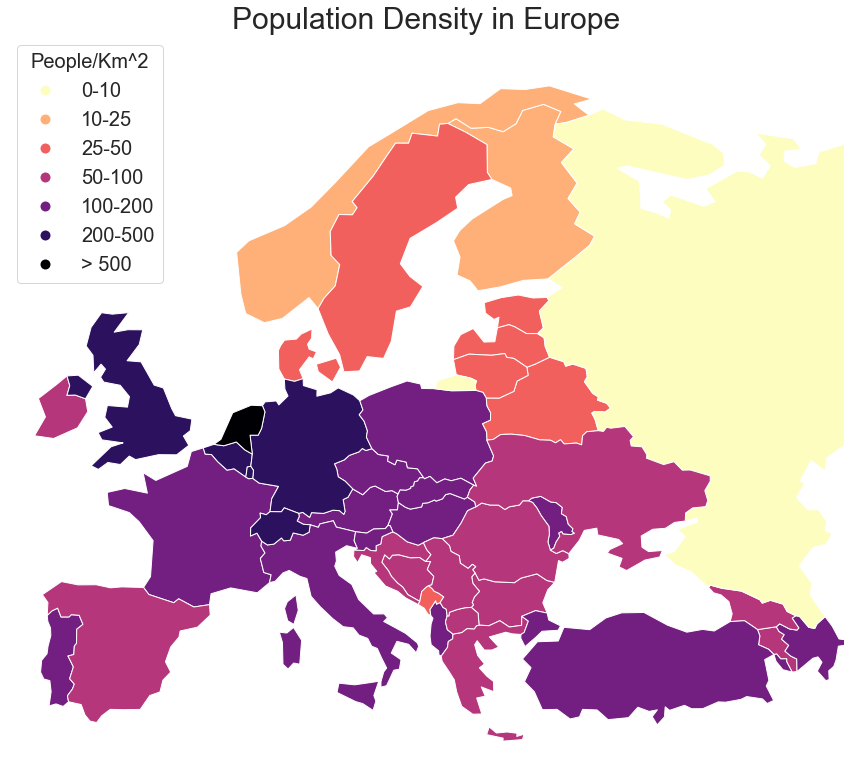

In [83]:
# Plotovanje geografskih podataka
sns.set_style("white")
europe_df.plot(
    "density_categories",
    legend=True,
    figsize=(15,15),
    cmap='magma_r',
    legend_kwds ={'loc':'upper left',
                 'fontsize':legend_size,
                 'title':'People/Km^2',
                 'title_fontsize':legend_size}
)
plt.title(
    "Population Density in Europe", fontdict={"fontsize": title_size}
)
plt.axis("off")
plt.axis([-12, 50, 33, 74])
plt.show()

In [84]:
# Deljnje numerickih podataka u vise kategorickih intervala
bins = np.array([0,10,25,50,100,200,500,np.inf])
world_df.loc[:, 'density_categories'] = pd.cut(
    world_df["density"],
    bins=bins,
    labels=[f'{int(bins[i - 1])}-{int(bins[i])}' for i in range(1, len(bins)-1)] + ['> 500']
)

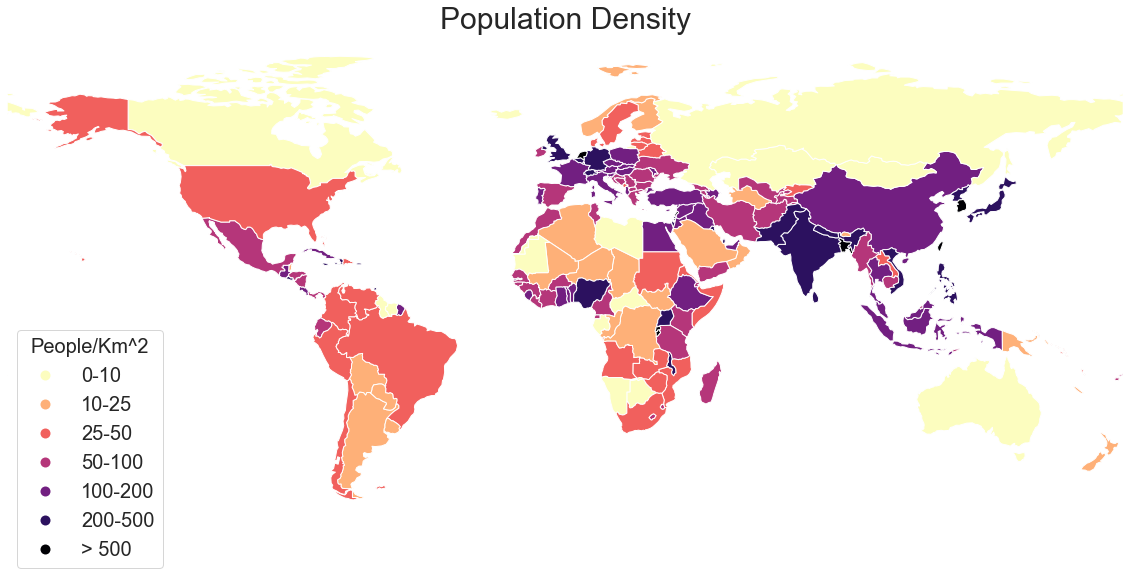

In [85]:
sns.set_style("white")
world_df.plot(
    "density_categories",
    legend=True,
    figsize=(20,20),
    cmap='magma_r',
    legend_kwds ={'loc':'lower left',
                 'fontsize':legend_size,
                 'title':'People/Km^2',
                 'title_fontsize':legend_size}
)
plt.title(
    "Population Density", fontdict={"fontsize": title_size}
)
plt.axis("off")
plt.axis([-180, 180, -80, 90])
plt.show()

## Fertility rates and Median Age

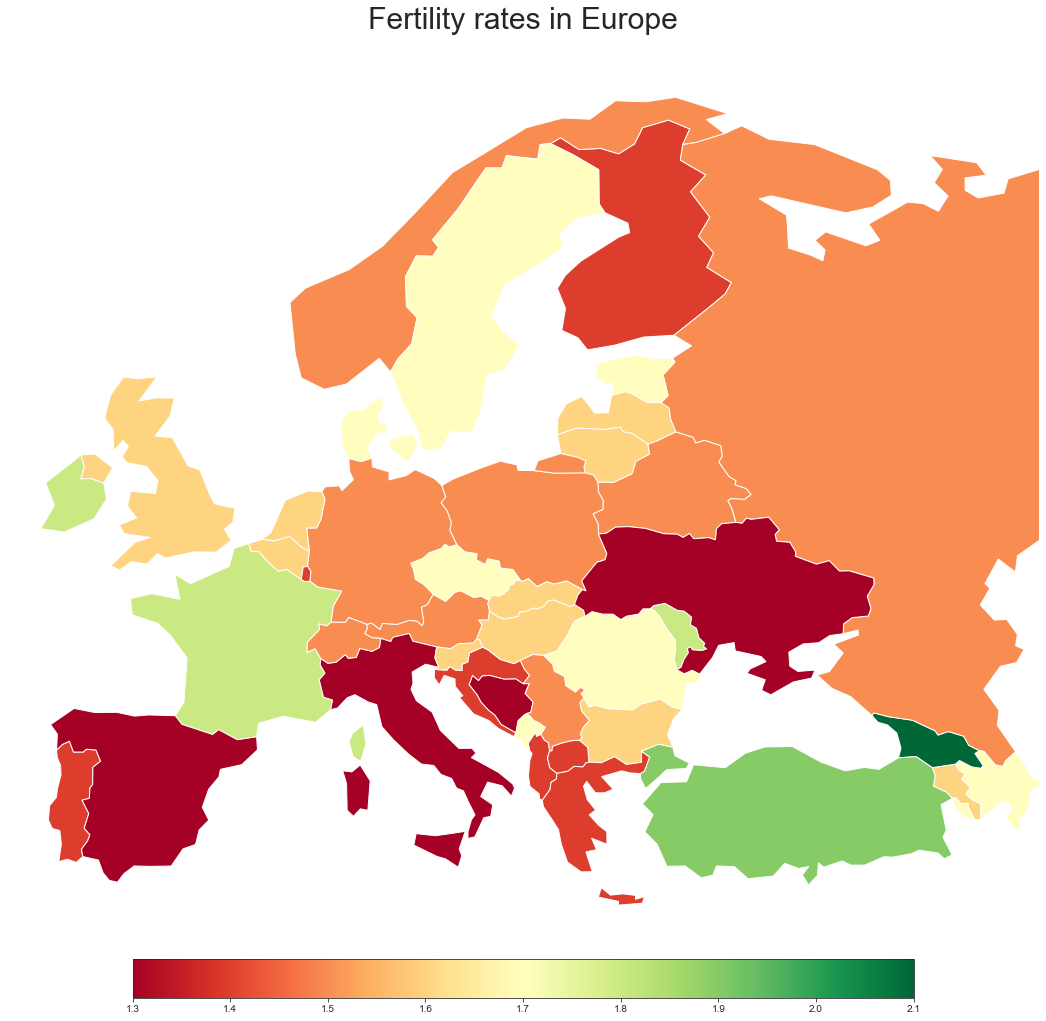

In [17]:
sns.set_style("white")
europe_df.plot(
    "fertility_rate",
    legend=True,
    figsize=(20,20),
    cmap="RdYlGn",
    legend_kwds={"orientation": "horizontal","pad": 0.01,'shrink':0.7}
)
plt.title(
    "Fertility rates in Europe", fontdict={"fontsize": 30}
)
plt.axis("off")
plt.axis([-12, 50, 33, 74])
plt.show()

Ukoliko zanmarimo migracije, drzavi je potrebna stopa fetiliteta od 2.1 da bi odrzavala svoje stanovnistvo

In [18]:
world_pop_by_country[world_pop_by_country.index.str.startswith('Holy')]

,population,yearly_change,net_change,density,land_area,net_migrants,fertility_rate,median_age,population_urban,world_share
country,,,,,,,,,,
Holy See,518,1.57,8,1295,0,0,NaN,NaN,NaN,0.0


Ne zna se da li je u Vatikanu stopa plodnosti nula ili taj podatak prosto nisu prosledili :D 

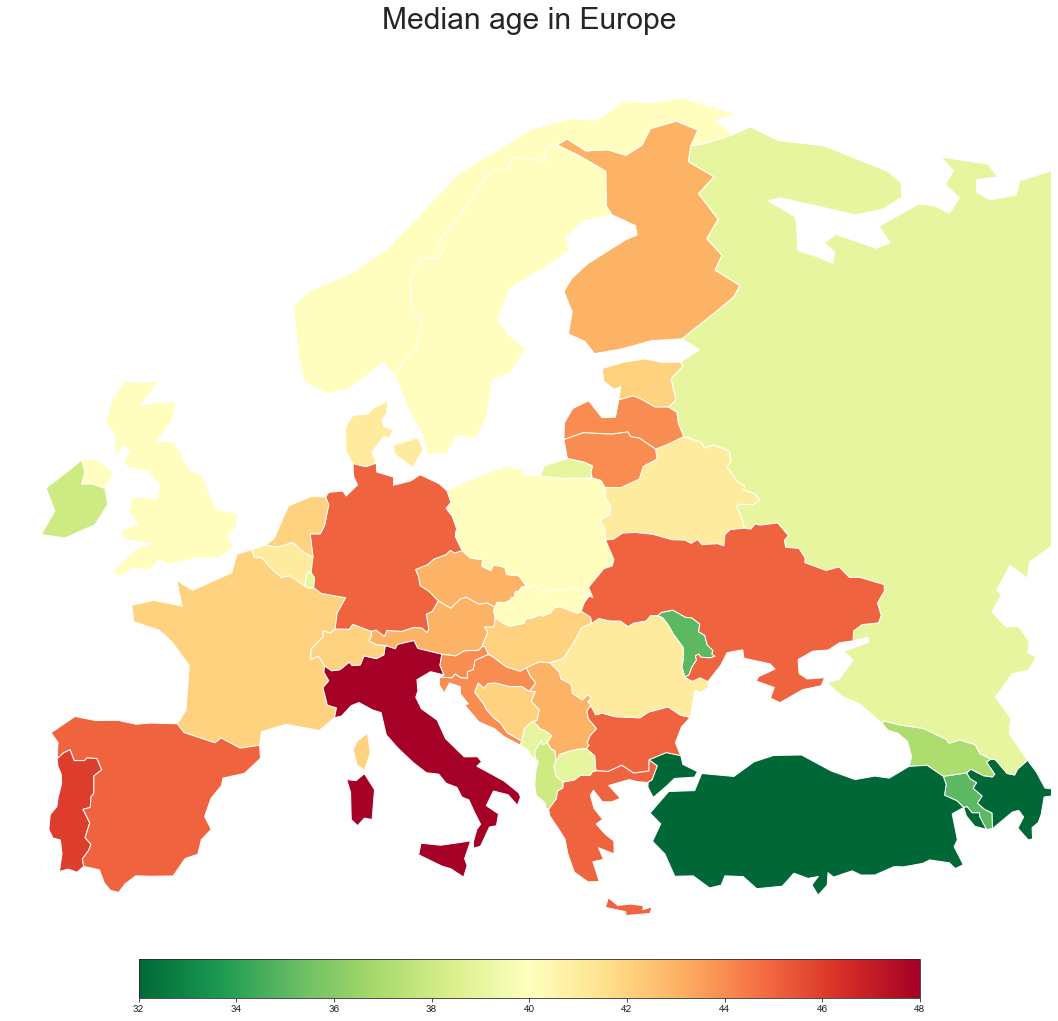

In [19]:
sns.set_style("white")
europe_df.plot(
    "median_age",
    legend=True,
    figsize=(20,20),
    cmap="RdYlGn_r",
    legend_kwds={"orientation": "horizontal","pad": 0.0,'shrink':0.7}
)
plt.title(
    "Median age in Europe", fontdict={"fontsize": 30}
)
plt.axis("off")
plt.axis([-12, 50, 33, 74])
plt.show()

Stopa plodnosti utice ne samo na buducnost drzave, vec i na trenutno stanje jer niska stop znaci staro stanovnistvo. 

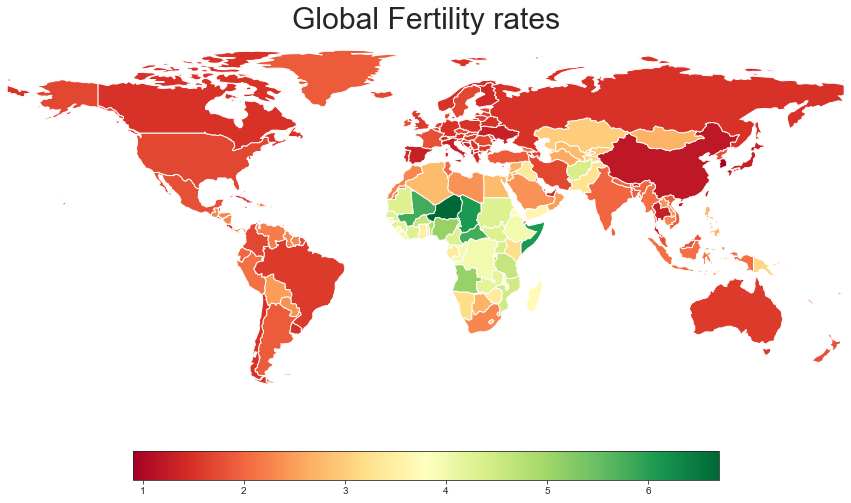

In [20]:
sns.set_style("white")
world_df.plot(
    "fertility_rate",
    legend=True,
    figsize=(15, 15),
    cmap="RdYlGn",
    legend_kwds={"orientation": "horizontal","pad": 0.01,'shrink': 0.7}
    
)
plt.title('Global Fertility rates',fontsize=title_size)
plt.axis("off")
plt.axis([-180, 180, -80, 90])
plt.show()

Najvecu stopu plodnosti ima Niger, gde zene u proseku radjaju sedmoro dece. Njihove komsije Cad, Amli, Nigerija, kao i Centralna Africka republika takodje imaju veliku stopu fertiliteta. Uopsteno u Sredisnjoj Africi s najvece stope
Juzna Koreja, Tajvan, Kina, Japan imaju jako malu stopu plodnosti. U Juznoj Korejia je stopa 0.9 

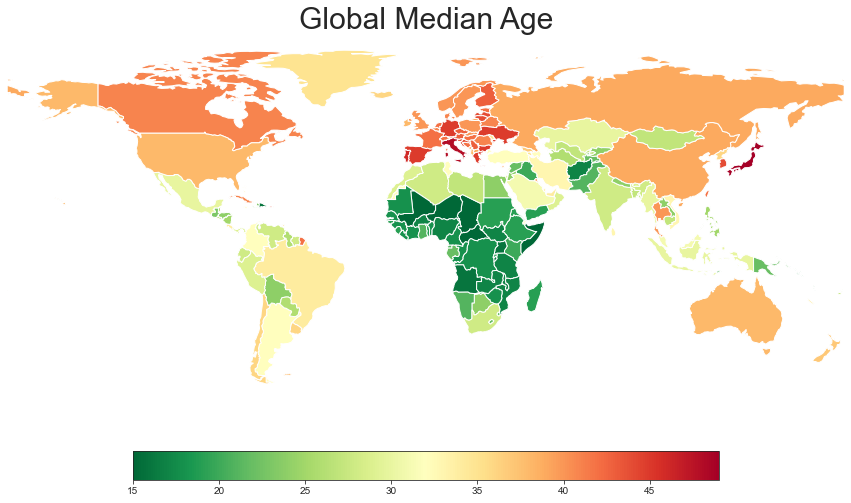

In [21]:
sns.set_style("white")
world_df.plot(
    "median_age",
    legend=True,
    figsize=(15, 15),
    cmap="RdYlGn_r",
    legend_kwds={"orientation": "horizontal","pad": 0.01,'shrink': 0.7}
    
)
plt.title('Global Median Age',fontsize=title_size)
plt.axis("off")
plt.axis([-180, 180, -80, 90])
plt.show()

# Change of Population

### Former Yugoslavia

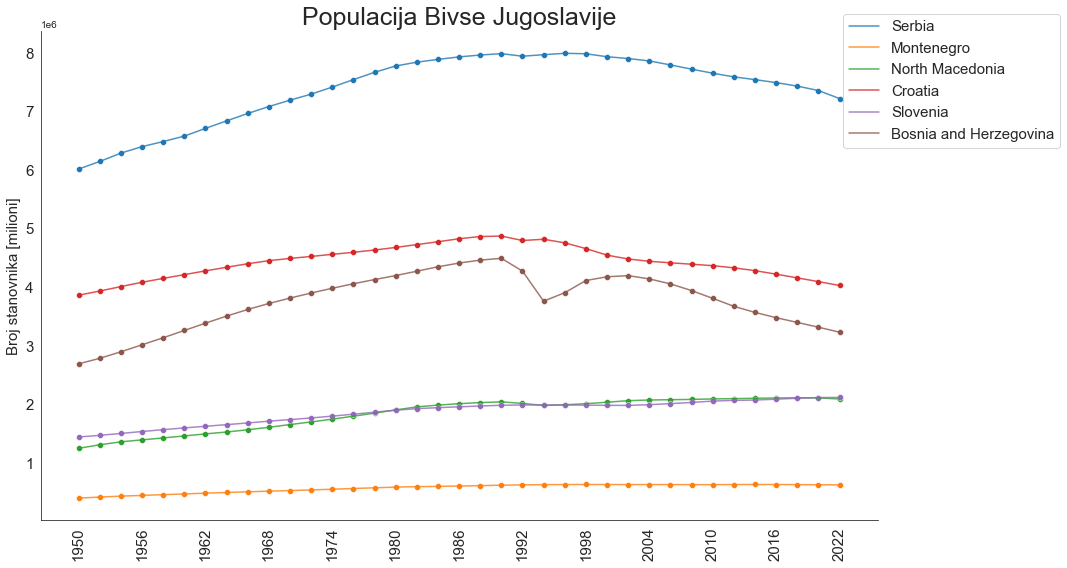

In [89]:
bivsa_juga_lista = ['Serbia','Montenegro','North Macedonia','Croatia','Slovenia','Bosnia and Herzegovina']
plt.figure(figsize=(15,9))

# Plotovanje liniskih plotova sa dodatim tackicama za svaku drzavu sa liste
for zemlja in bivsa_juga_lista:
    sns.lineplot(y = population_by_year.loc[::2,zemlja],x = population_by_year.index[::2],alpha=0.8,label=zemlja)
    sns.scatterplot(y=population_by_year.loc[::2, zemlja], x=population_by_year.index[::2], marker='o')

# Dodavanje dadatnih informacija u plot
plt.title('Populacija Bivse Jugoslavije',fontsize=title_size-5)   
plt.xticks(population_by_year.index[::6],rotation=90,fontsize=legend_size-5)
plt.yticks(fontsize=legend_size-5)
plt.ylabel('Broj stanovnika [milioni]',fontsize=legend_size-5)
plt.legend(loc='upper left',fontsize=legend_size-5,bbox_to_anchor= (0.95, 1.05))
sns.despine() # Uklanja okvir od govre i sa desne srtane
plt.show()

In [23]:
# Racunanje stope rasta populacije za svaku drzavu i godinu posebno
growth_by_year = pd.DataFrame()
for i in range(1,len(population_by_year)):
    growth_by_year[population_by_year.index[i]] = (population_by_year.iloc[i]-population_by_year.iloc[i-1])/population_by_year.iloc[i-1]
growth_by_year = growth_by_year.T*100

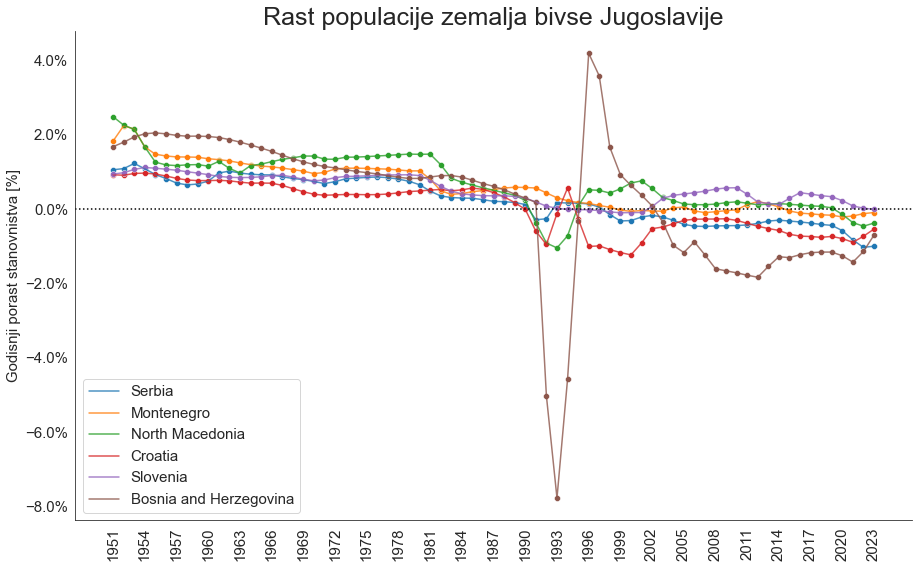

In [24]:
bivsa_juga_lista = ['Serbia','Montenegro','North Macedonia','Croatia','Slovenia','Bosnia and Herzegovina']
plt.figure(figsize=(15,9))

for zemlja in bivsa_juga_lista:
    sns.lineplot(y = growth_by_year.loc[::1,zemlja],x = growth_by_year.index[::1],alpha=0.8,label=zemlja)
    sns.scatterplot(y=growth_by_year.loc[::1, zemlja], x=growth_by_year.index[::1], marker='o')

    
plt.title('Rast populacije zemalja bivse Jugoslavije',fontsize=title_size-5)
plt.xticks(growth_by_year.index[::3],rotation=90,fontsize=legend_size-5)
plt.yticks(fontsize=legend_size-5)
plt.axhline(0,linestyle='dotted',color='black')
plt.ylabel('Godisnji porast stanovnistva [%]',fontsize=legend_size-5)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(fontsize=legend_size-5, loc='lower left')
sns.despine()
plt.show()

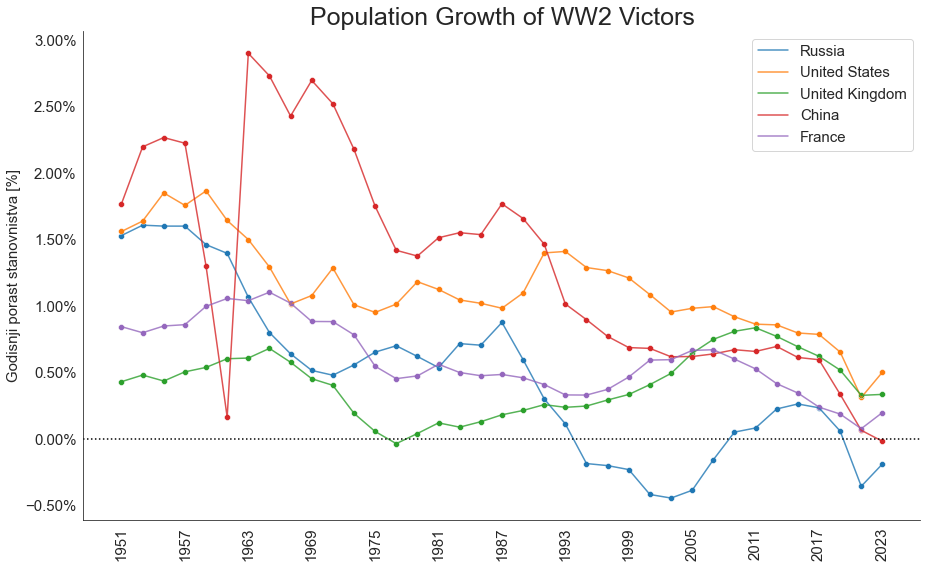

In [25]:
pobednice_ww2_lista = ['Russia','United States','United Kingdom','China','France']


plt.figure(figsize=(15,9))
for zemlja in pobednice_ww2_lista:
    sns.lineplot(y = growth_by_year.loc[::2,zemlja],x = growth_by_year.index[::2],alpha=0.8,label=zemlja)
    sns.scatterplot(y=growth_by_year.loc[::2, zemlja], x=growth_by_year.index[::2], marker='o')


plt.title('Population Growth of WW2 Victors',fontsize=25)
plt.xticks(growth_by_year.index[::6],rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(0,linestyle='dotted',color='black')
plt.ylabel('Godisnji porast stanovnistva [%]',fontsize=15)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(fontsize=15, loc='upper right')
sns.despine()
plt.show()

Na mapi se vidi uticaj Maovog Velikog koraka napred kao i pada Sovjetskog Saveza. Takodje vidimo uticaj kineske politike jednog deteta. 

In [26]:
bins = np.array([-np.inf,-2e6, -50000, 0,50000,100000,1e6,np.inf])
europe_df.loc[:, 'net_change_categories'] = pd.cut(
    europe_df["net_change"],
    bins=bins,
    # Razdovji brojeve zarad lepseg zapisa
    labels=["< " + "{:,}".format(i).replace(",", " ")[:-2] for i in bins[1:-1]] + ["> 1 000 000"],
)

C:\Users\ilija\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\ilija\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<Figure size 1080x1080 with 0 Axes>

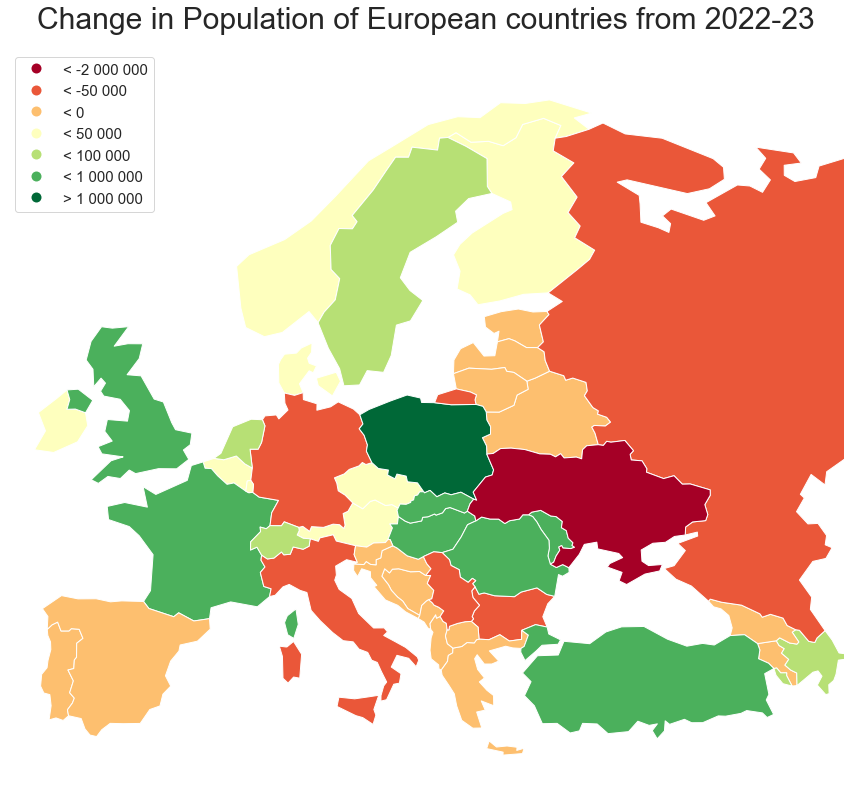

In [42]:
sns.set_style("white")
plt.figure(figsize=(15, 15))

europe_df.plot(
    column="net_change_categories", 
    legend=True,
    figsize=(15, 15),
    cmap="RdYlGn",
    legend_kwds={"loc": 'upper left',
                'fontsize':15}  
)

plt.title("Change in Population of European countries from 2022-23", fontdict={"fontsize": title_size},y=1.02)
plt.axis("off")
plt.axis([-12, 50, 33, 74])
plt.show()


Interesantno je jako da je Nemacka izgubila populaciju. Dosta Nemaca se seli iz Nemacke pogotovo obucene rande snage
Dosta Nemaca odlazi iz zemlje zbog posla. Najpozeljnije destinaciju su im Svajcarska, Austrija, Engleska, Amerika
Dosta penzionera odlazi zbog bolje klime, suncanih plaza na jug. 
Italija je ostala bez 160k i ona je sa bugarskom koja je izgubila 90k najkriticnija spram njihovog stanovnistva. Tu smo mi koji smo izgubbilo stanovnistvo od 72k
https://www.dw.com/en/educated-germans-leave-home-to-earn-more-money-abroad-for-a-while/a-51535494#:~:text=Around%20180%2C000%20German%20citizens%20emigrate,United%20States%2C%20and%20Great%20Britain.

## Odnos populacija Ukrajine i Poljske

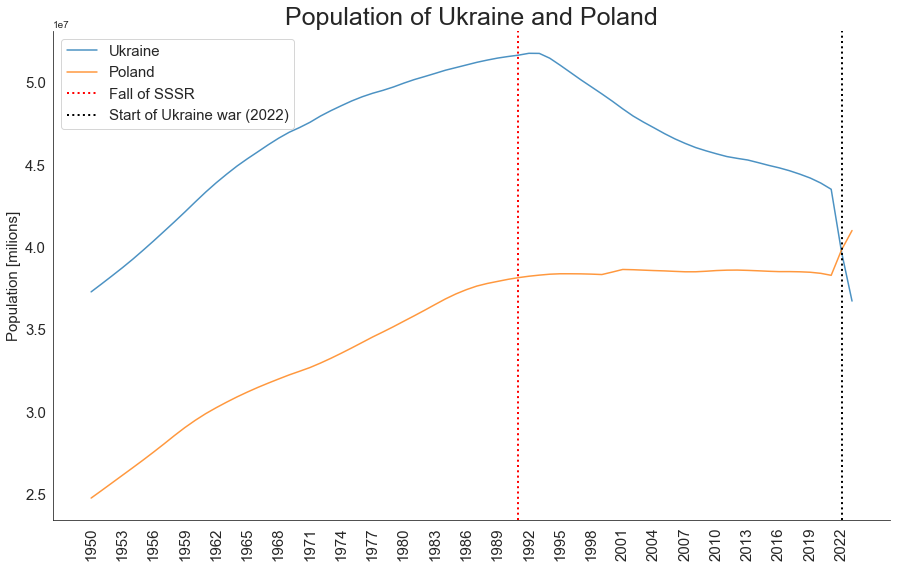

In [28]:
poljska_ukrajina_lista = ['Ukraine','Poland']


plt.figure(figsize=(15,9))
plt.title('Population of Ukraine and Poland',fontsize=25)
for zemlja in poljska_ukrajina_lista:
    sns.lineplot(y = population_by_year.loc[:,zemlja],x = population_by_year.index,alpha=0.8,label=zemlja)
    
plt.xticks(population_by_year.index[::3],rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Population [milions]',fontsize=15)
plt.axvline('1991', color='red', linestyle='dotted', linewidth=2, label='Fall of SSSR')
plt.axvline('2022', color='black', linestyle='dotted', linewidth=2, label='Start of Ukraine war (2022)')
plt.legend(loc='upper left',fontsize=15)
sns.despine()
plt.show()

In [29]:
bins = np.array([-np.inf,-2e6,-200000, -50000, 0, 50000,200000,1e6,np.inf])
world_df.loc[:, 'net_change_categories'] = pd.cut(
    world_df["net_change"],
    bins=bins,
    labels=["< " + "{:,}".format(i).replace(",", " ")[:-2] for i in bins[1:-1]] + ["> 1 000 000"],
)

<Figure size 1080x1080 with 0 Axes>

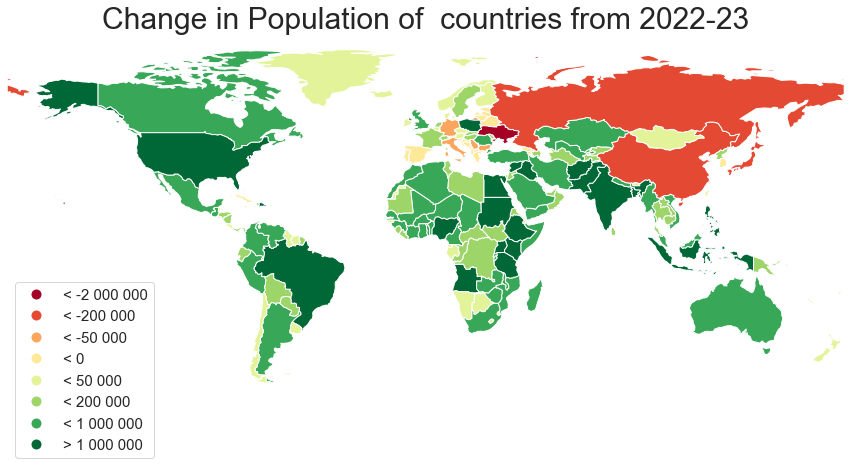

In [30]:
sns.set_style("white")
plt.figure(figsize=(15, 15))

world_df.plot(
    column="net_change_categories", 
    legend=True,
    figsize=(15, 15),
    cmap="RdYlGn",
    legend_kwds={"loc": 'lower left',
                'fontsize':15}  
)

plt.title("Change in Population of  countries from 2022-23", fontdict={"fontsize": title_size})
plt.axis("off")
plt.axis([-180,180,-90,90])
plt.show()

Vidimo na grafiku da je Amerika dobila milion stanovnika iako im je stopa plodnosti niska sto ukazuje na mnogo doseljenika. 

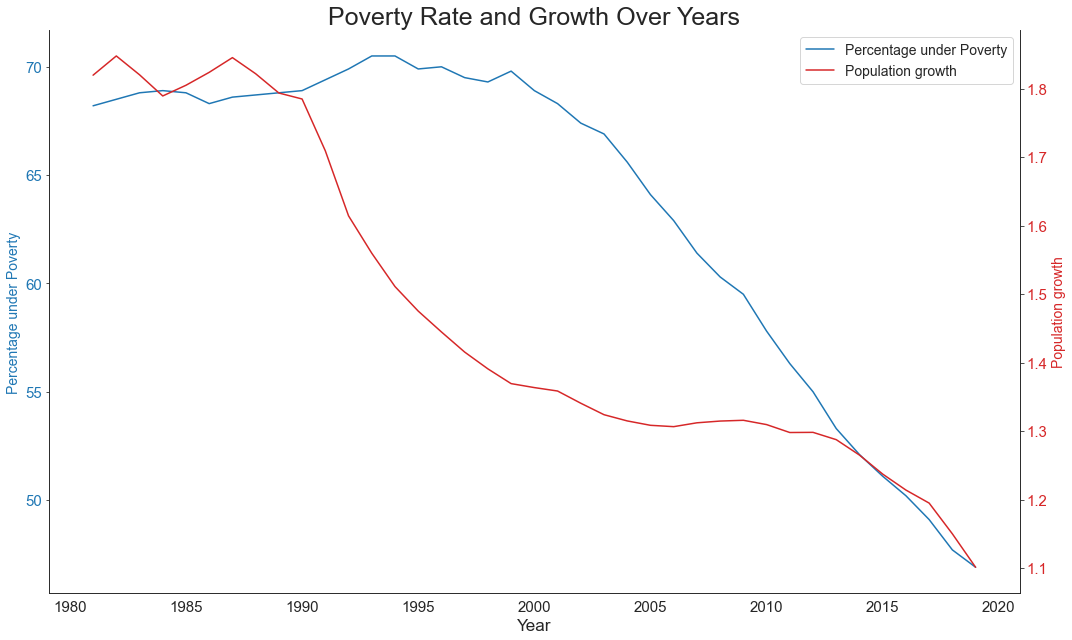

In [45]:

fig, ax1 = plt.subplots(figsize=(15, 9))

label_size = 15

# Prvi plot
line1 = ax1.plot(poverty['Year'], poverty['% Under $5.50 Per Day'], color='tab:blue', label='Percentage under Poverty')
ax1.set_xlabel('Year', fontsize=17)
ax1.set_ylabel('Percentage under Poverty', color='tab:blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=label_size)
ax1.tick_params(axis='x', labelsize=label_size)

# Drugi plot koji deli x osu sa drugim
ax2 = ax1.twinx()
line2 = ax2.plot(poverty['Year'], poverty['Growth'], color='tab:red', label='Population growth')
ax2.set_ylabel('Population growth', color='tab:red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=label_size)

# Kombinovanje labela
lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('Poverty Rate and Growth Over Years', fontsize=25)
fig.tight_layout()
plt.legend(lines, labels, loc='upper right', fontsize=14)
sns.despine(right=False)
plt.show()


In [92]:
poverty[['Growth','% Under $5.50 Per Day']].corr()

,Growth,% Under $5.50 Per Day
Growth,1.000000,0.700354
% Under $5.50 Per Day,0.700354,1.000000


Grafik nam govori da su stopa rasta populacije i siromastva korelisane.
Grafik se nadovezuje na ranija istrazivanja koja kažu da bogatiji ljudi imaju manje dece.
Zene u bogatijim nacijama mogu da kontrolisu svoj reproduktivni sistem

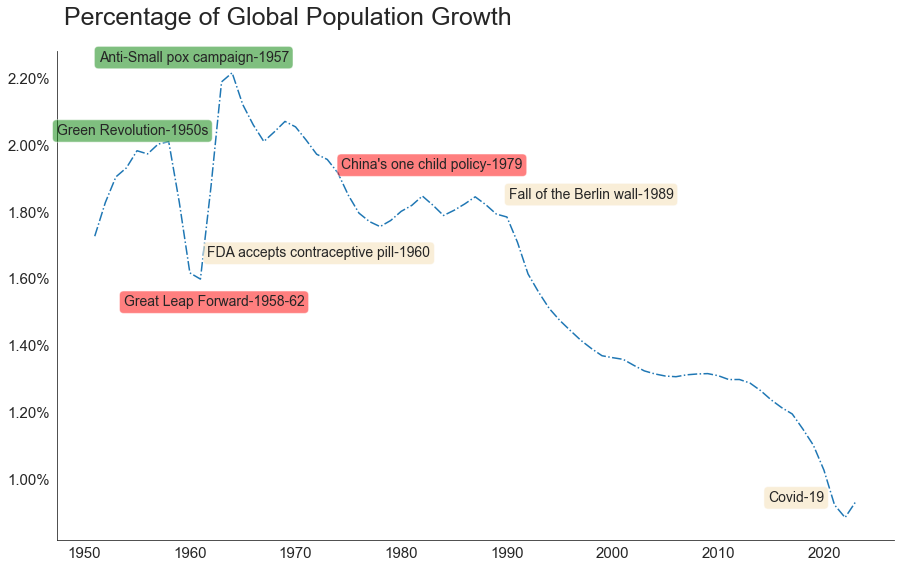

In [40]:
plt.title(' Percentage of Global Population Growth',fontsize=25,loc='left',y=1.04)
world_pop_growth_by_year_df.plot(kind='line',figsize=(15,9),linestyle='dashdot')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Dodavanje anotacija na mapu
plt.annotate('Great Leap Forward-1958-62', xy=(0.08, 0.5), xycoords='axes fraction',
             fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))
plt.annotate('Green Revolution-1950s', xy=(-0.0, 0.85), xycoords='axes fraction',
             fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='green', alpha=0.5))
plt.annotate('Anti-Small pox campaign-1957', xy=(0.05, 1), xycoords='axes fraction',
             fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='green', alpha=0.5))
plt.annotate('FDA accepts contraceptive pill-1960', xy=(0.18, 0.6), xycoords='axes fraction',
             fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.annotate("China's one child policy-1979", xy=(0.34, 0.78), xycoords='axes fraction',
             fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))
plt.annotate('Fall of the Berlin wall-1989', xy=(0.54, 0.72), xycoords='axes fraction',
             fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.annotate('Covid-19', xy=(0.85, 0.1), xycoords='axes fraction',
             fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.despine()

plt.show()

Norman Borlaug je jedan od najzasluznijih agronoma koji je doprineo trecog poljoprivrednoj revoluciji takodje poznatnoj kao zelena revolucija 
Anti-Small pox campaign was started by Soviet scientist Victor Zhdaov and it had the goal of eradicating smallpox in third world 
Veliki korak napred je bio amiciozan pokret Kineza da iz niskoproduktivnog agarnog drustva predju u visoko produktivno industrisko drustvo. Doslo je do raspada organizacije i prouzrokovana je glad koja je ubila vise miliona ljudi 
On June 23, 1960, the FDA approved the sale of Enovid for use as an oral contraceptive. It was manufactured by G.D. Searle and Company, a firm that had also supported Gregory Pincus' research for many years
Pad Berlinskog zida je omogucio vecu globalizaciju